# **DEEP LEARNING ASSIGNMENT ON CIFAR DATASET**

# **Importing necessary libraries**

Here, we are importing one additional library named **Secure Sockets Layer (SSL)** which  is a protocol for securing communication on the Internet. It provides a way for enterprises to encrypt data before sending it to users, preventing third parties from reading it while it's in transit.

**_create_unverified_context()** function can be used to create an unverified SSLContext - a context with disables all certificate verification.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


# **Importing Dataset**
CIFAR-10 is a dataset of 50,000 32x32 color raining images, labeled over 10 categories and 10,000 test images.

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape #printing shapes

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

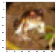

In [ ]:
# FROG 
plt.figure(figsize = (6,4),dpi = 16 )
plt.imshow(x_train[0])

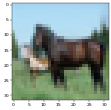

In [ ]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

# **PreProcessing**

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_train[0].shape

(32, 32, 3)

# **Scaling the Dataset**

In [ ]:
x_train.max()

255

We can scale the data to the range between 0 and 1 by dividing it by 255.

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

# **Data Labelling**

In [ ]:
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix. E.g. for use with categorical_crossentropy .

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Building the Model**

**A Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

**The Dense layer** is a normal fully connected layer in a neuronal network.

**Keras Conv2D** is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

**The keras maxpooling2d** uses the class name as maxpool2d and it will use the tf keras layers, maxpooling2d class. It contains the integer or 2 integer's tuples factors which is used to downscale the spatial dimension. It contains the max pooling operation into the 2D spatial data.

**Flatten** is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4)

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

Lets first construct a **Convolutional layer** which is the major building blocks used in convolutional neural networks.

In the below code, **filters** is the collection of all C_in no. of kernels used in the convolution of the channels of the input tensor.

**kernel_size** is an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 

**input_shape** is the shape tuple (tuple of integers) or list of shape tuples (one per output tensor of the layer).

Here, we used **rectified linear activation function or ReLU** which is a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [ ]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))


**Pooling layers** provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map.

In [ ]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 64, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))

In [ ]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

In [ ]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu'))

Now,softmax is implemented through a neural network layer just before the output layer.

In [ ]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

Here,**categorical_crossentropy** is used as a loss function for multi-class classification model where there are two or more output labels.

**RMSprop optimizer** is used here which is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster.

# **Compiling the model**

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

# **Defining Early stopping**

Now, we are importing **EarlyStopping** to Stop training when a monitored metric has stopped improving. Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss' , and mode would be 'min' 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

Here, we are using validation loss as performance measure to terminate the training.

Also patience = 3 which is the number of epochs with no improvement after which training will be stopped.

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

# **Executing the model**

In [ ]:
model.fit(x_train, y_cat_train, epochs = 5, 
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/5
1563/1563 [==============================] - 105s 66ms/step - loss: 1.4834 - accuracy: 0.4687 - val_loss: 1.2259 - val_accuracy: 0.5694
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.1049 - accuracy: 0.6151 - val_loss: 1.1924 - val_accuracy: 0.5903
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9473 - accuracy: 0.6721 - val_loss: 1.0823 - val_accuracy: 0.6277
Epoch 4/5
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8332 - accuracy: 0.7172 - val_loss: 0.9891 - val_accuracy: 0.6711
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7523 - accuracy: 0.7455 - val_loss: 0.9499 - val_accuracy: 0.6831


Saving the model

In [ ]:
model.save('cifar_10epochs.h5')

# **Evalation of model**

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.483368,0.46868,1.225882,0.5694
1,1.104917,0.61514,1.192353,0.5903
2,0.947325,0.67210,1.082264,0.6277
3,0.833184,0.71722,0.989136,0.6711
4,0.752315,0.74550,0.949913,0.6831


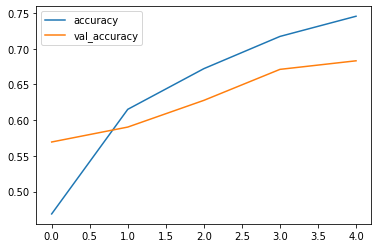

In [ ]:
losses[['accuracy','val_accuracy']].plot();

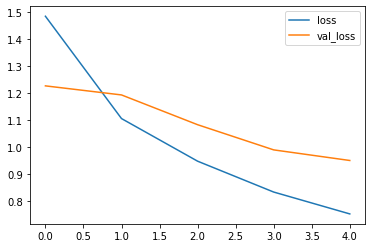

In [ ]:
losses[['loss','val_loss']].plot();

From thr above two graphs, we can conclude that our model is neither overfitting nor underfitting since our validation loss stops decreasing steadily after a particular interval and also our validation accuracy stops increasing steadily after some period

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[0.9499130845069885, 0.6830999851226807]


Thus we created a model with 95% loss and 68% accuracy

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix 
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 6s 18ms/step


In [ ]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.83      0.78      0.80      1000
           2       0.64      0.51      0.57      1000
           3       0.45      0.61      0.52      1000
           4       0.71      0.58      0.64      1000
           5       0.66      0.47      0.55      1000
           6       0.71      0.79      0.75      1000
           7       0.77      0.70      0.73      1000
           8       0.77      0.80      0.78      1000
           9       0.68      0.83      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
confusion_matrix(y_test,predict_classes)

array([[779,  23,  25,  20,  12,   5,  13,   3,  82,  38],
       [ 28, 775,   7,   9,   1,   0,  11,   2,  29, 138],
       [ 87,  16, 505,  98,  69,  58,  85,  36,  21,  25],
       [ 34,   9,  47, 607,  57,  88,  63,  36,  16,  43],
       [ 31,   4,  70, 110, 579,  29,  88,  58,  20,  11],
       [ 15,   5,  55, 282,  39, 467,  37,  56,  13,  31],
       [ 11,   8,  32,  92,  11,  12, 792,   5,  13,  24],
       [ 34,   3,  31,  83,  42,  38,  13, 696,   8,  52],
       [ 86,  34,   5,  19,   3,   8,   7,   3, 797,  38],
       [ 37,  58,   6,  15,   2,   4,   6,   5,  33, 834]])

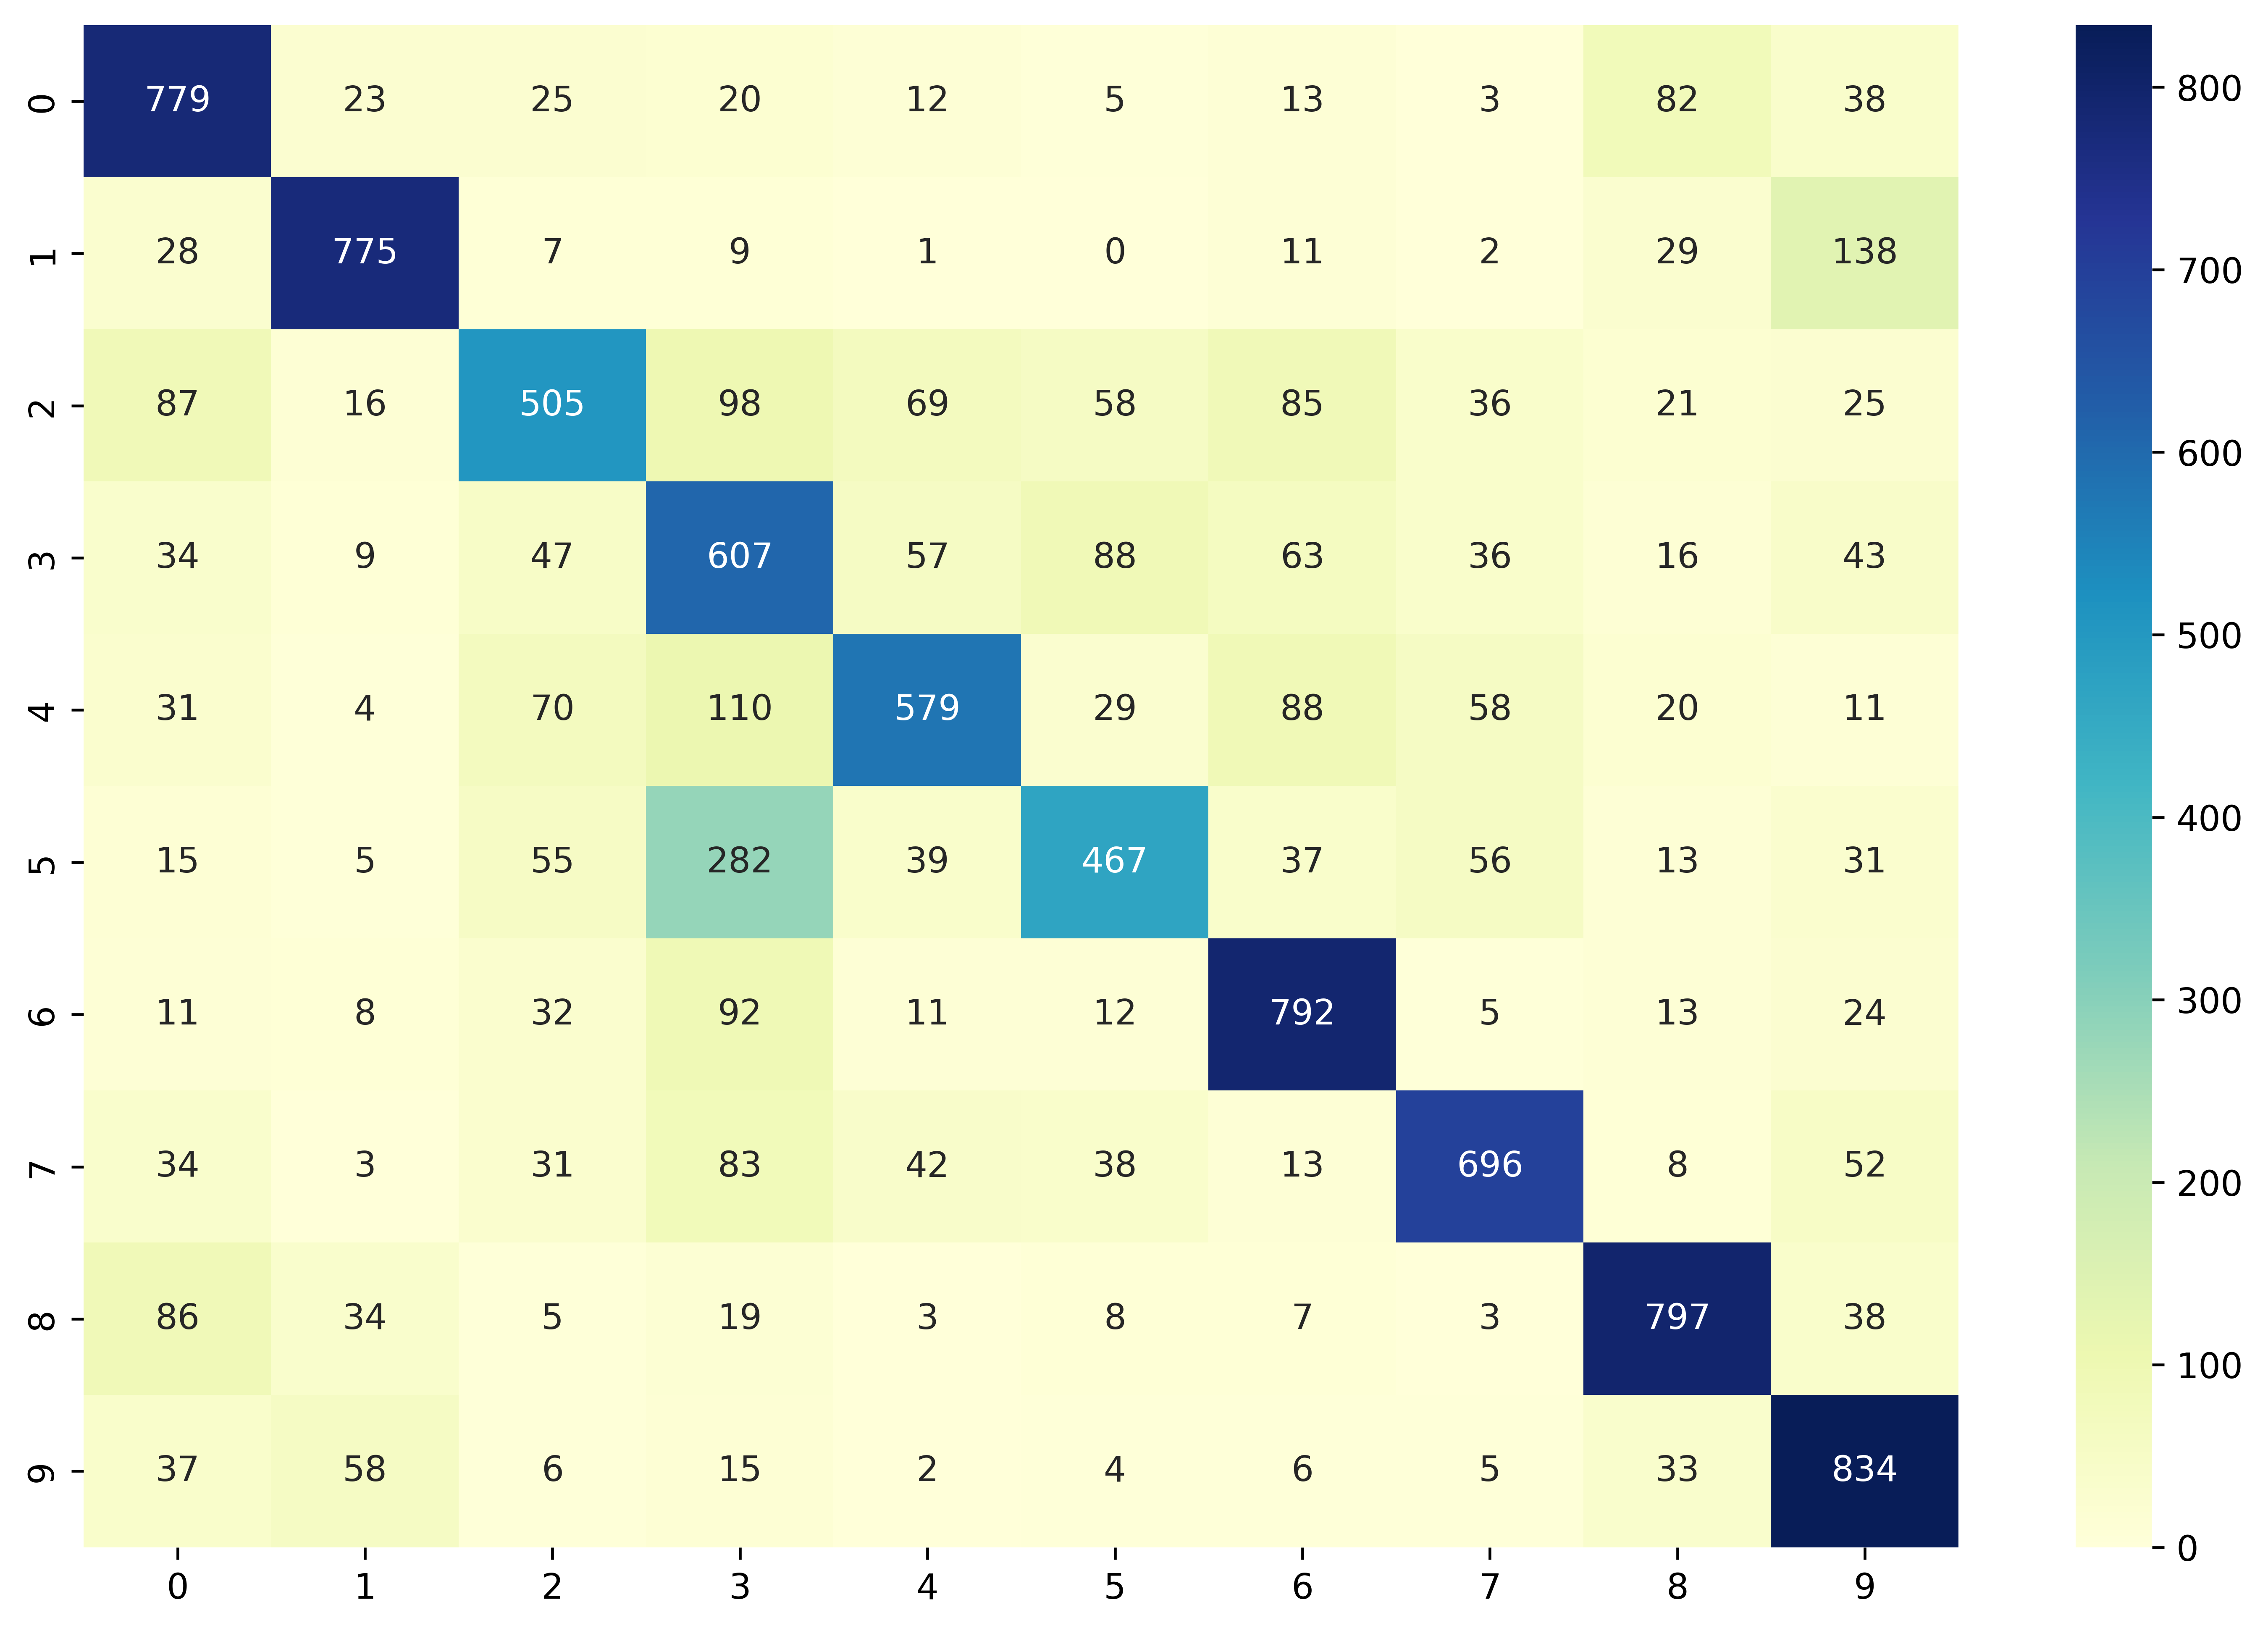

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g'); #plotting heatmap

# **Predicting a given image**

In [56]:
my_image = x_test[15]

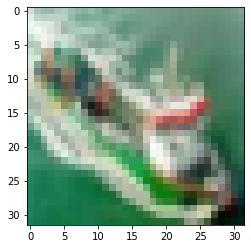

In [57]:
plt.imshow(my_image)

In [63]:
my_image = x_test[19]

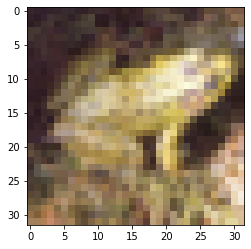

In [64]:
plt.imshow(my_image)

In [65]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3)) 

1/1 [==============================] - 0s 20ms/step


array([[0.000165, 0.002321, 0.004205, 0.022238, 0.087394, 0.003430,
        0.878889, 0.001083, 0.000051, 0.000223]], dtype=float32)